# Preprocessing

In [1]:
%load_ext lab_black

In [36]:
import os
import sys

import pandas as pd

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, QuantileTransformer
from sklearn.compose import ColumnTransformer

In [3]:
sys.path.append("../")
os.chdir("../")

In [4]:
from pipelines.config import *

In [5]:
df_raw = pd.read_csv(raw_data_full_path)
df_raw.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Categories: ordinal encoding

In [6]:
df_raw["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [7]:
mapping = {"ISLAND": 0, "NEAR BAY": 1, "<1H OCEAN": 2, "NEAR OCEAN": 3, "INLAND": 4}

In [8]:
df_ordinal = df_raw.copy()
df_ordinal["ocean_proximity"] = df_ordinal["ocean_proximity"].map(mapping)

In [9]:
df_ordinal.to_pickle(os.path.join(data_path, "ordinal_encoding.pkl"))

## Categories: onehot encoding

In [10]:
transformer = ColumnTransformer(
    [("onehot", OneHotEncoder(), ["ocean_proximity"])], remainder="passthrough"
)
df_onehot = transformer.fit_transform(df_raw)

## Outlier cutting

In [50]:
from sklearn.preprocessing import PowerTransformer

qt = PowerTransformer()

qt.fit(df_onehot)

df_q = qt.transform(df_onehot)

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

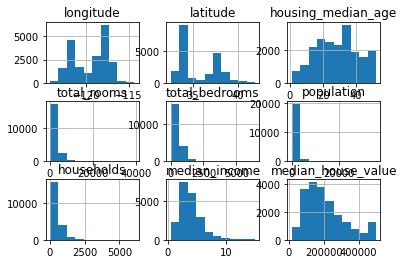

In [51]:
df_raw.hist()

In [52]:
df_q = pd.DataFrame(df_q)

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>],
       [<AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>,
        <AxesSubplot:title={'center':'6'}>,
        <AxesSubplot:title={'center':'7'}>],
       [<AxesSubplot:title={'center':'8'}>,
        <AxesSubplot:title={'center':'9'}>,
        <AxesSubplot:title={'center':'10'}>,
        <AxesSubplot:title={'center':'11'}>],
       [<AxesSubplot:title={'center':'12'}>,
        <AxesSubplot:title={'center':'13'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

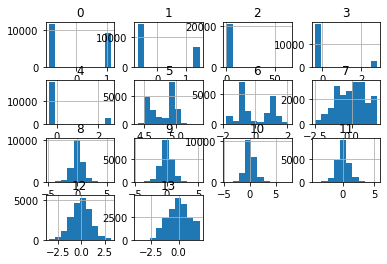

In [54]:
df_q.hist()